In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler


In [3]:
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

all_df = pd.concat(([train_df,test_df]))

In [4]:
test_df.columns

Index(['index', 'pc', 'ld', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'ma'],
      dtype='object')

In [5]:
train_df.columns

Index(['pc', 'ld', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'm14', 'ma', 'pred'],
      dtype='object')

In [6]:
all_df.isna().sum()

pc           0
ld         250
m0           0
m1           0
m2           0
m3         381
m4         538
m5         676
m6         796
m7         937
m8        1048
m9        1227
m10       1300
m11       1468
m12       1601
m13       1774
m14       1874
ma           0
pred      3986
index    22584
dtype: int64

### 1. pc

So it is a categorical feature with all categoreies present both in train and test dataset, though this does not have much dependece on output so can be dropped to prevent overfitting

In [7]:
train_df.pc.unique()

array(['y', 'E', 'x', 'w', 'z'], dtype=object)

In [8]:
test_df.pc.unique()

array(['E', 'y', 'w', 'z', 'x'], dtype=object)

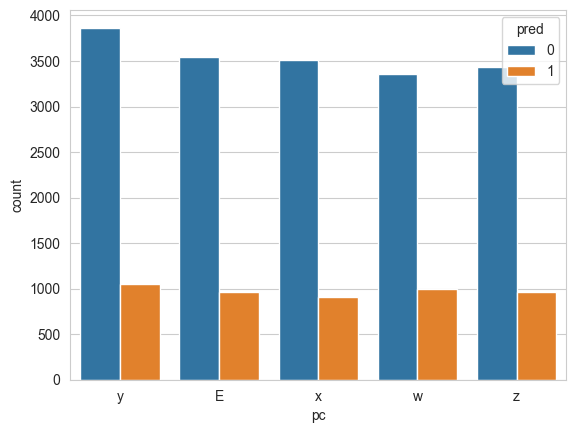

In [9]:
# Calculate the percentage of pred 1 and pred 0
total_count = len(train_df)
pred_counts = train_df['pred'].value_counts()
pred_percentages = pred_counts / total_count * 100

# Create the count plot
sns.countplot(x=train_df['pc'], hue=train_df['pred'])

# Show the plot
plt.show()


In [10]:
for cat in all_df.pc.unique():
    n = len(train_df[(train_df.pred==1) & (train_df.pc==cat)])
    d = len(train_df[train_df.pc==cat])

    perc = (n*100)/d
    print(f"Percentage of {cat} values which have target 1 are {perc}")


Percentage of y values which have target 1 are 21.363173957273652
Percentage of E values which have target 1 are 21.33510756265247
Percentage of x values which have target 1 are 20.457634798368826
Percentage of w values which have target 1 are 22.954963235294116
Percentage of z values which have target 1 are 21.82521620391443


In [11]:
# all_df.drop('pc', axis=1, inplace=True)
# dropping pc column as it gave little info about the pred

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

all_df["pc"] = encoder.fit_transform(all_df["pc"])
all_df.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pred,index
0,3,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.0968,150.3390,12.4880,173.1240,m78,0.0,NaN
1,3,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.3304,101.0205,12.5096,131.4075,m78,0.0,NaN
2,0,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,NaN,122.5350,11.7136,176.8200,m76,1.0,NaN
3,2,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,NaN,124.8030,13.8424,168.2625,m55,0.0,NaN
4,0,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.4720,120.2145,NaN,150.1185,m76,0.0,NaN


#### 2. LD

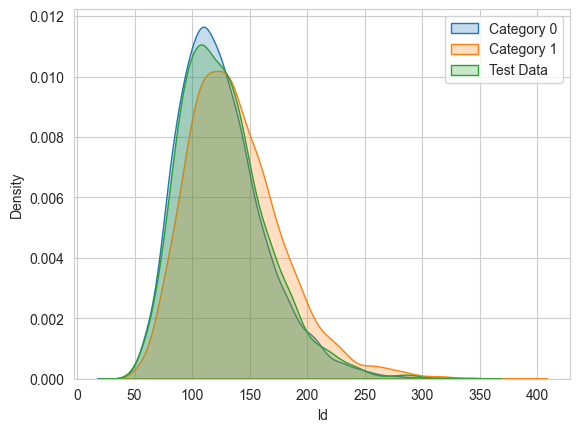

In [12]:
sns.kdeplot(data=train_df[train_df['pred']==0], x='ld', fill=True, label='Category 0')
sns.kdeplot(data=train_df[train_df['pred']==1], x='ld', fill=True, label='Category 1')
sns.kdeplot(test_df.ld,fill=True,label="Test Data")
plt.legend()
plt.show()

# similar to normal distribution (a bit right skewed though)

In [13]:
all_df.loc[((all_df['pred'].isnull()) & (all_df["ld"].isnull())), 'ld'] = all_df.ld.mean()
all_df.loc[(all_df['pred'] == 1) & (all_df["ld"].isnull()), 'ld'] = train_df[train_df.pred == 1]["ld"].mean()
all_df.loc[(all_df['pred']==0) & (all_df["ld"].isnull()), 'ld'] = train_df[train_df.pred==0]["ld"].mean()
all_df.isna().sum()

pc           0
ld           0
m0           0
m1           0
m2           0
m3         381
m4         538
m5         676
m6         796
m7         937
m8        1048
m9        1227
m10       1300
m11       1468
m12       1601
m13       1774
m14       1874
ma           0
pred      3986
index    22584
dtype: int64

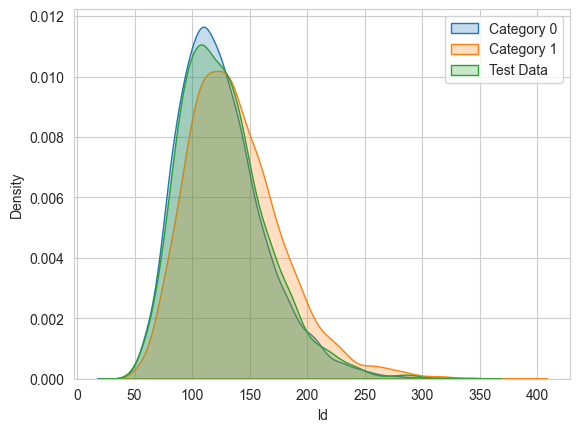

In [14]:
sns.kdeplot(data=train_df[train_df['pred']==0], x='ld', fill=True, label='Category 0')
sns.kdeplot(data=train_df[train_df['pred']==1], x='ld', fill=True, label='Category 1')
sns.kdeplot(test_df.ld,fill=True,label="Test Data")
plt.legend()
plt.show()

#### 3. m0

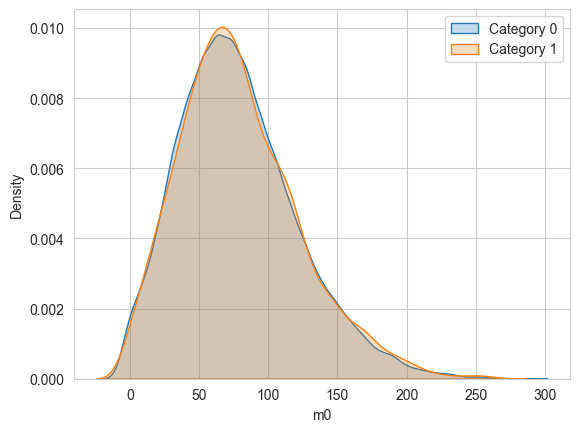

In [15]:
sns.kdeplot(data=train_df[train_df['pred']==0], x='m0', fill=True, label='Category 0')
sns.kdeplot(data=train_df[train_df['pred']==1], x='m0', fill=True, label='Category 1')
# sns.kdeplot(test_df.m0,fill=True)
plt.legend()
plt.show()

In [16]:
# all_df.m14.fillna(all_df.m14.mean(),inplace=True)
# all_df.m13.fillna(all_df.m13.mean(), inplace=True)
# all_df.m12.fillna(all_df.m12.mean(), inplace=True)
# all_df.m11.fillna(all_df.m11.mean(), inplace=True)
# all_df.m10.fillna(all_df.m10.mean(), inplace=True)
# all_df.m9.fillna(all_df.m9.mean(), inplace=True)
# all_df.m8.fillna(all_df.m8.mean(), inplace=True)
# all_df.m7.fillna(all_df.m7.mean(), inplace=True)
# all_df.m6.fillna(all_df.m6.mean(), inplace=True)
# all_df.m5.fillna(all_df.m5.mean(), inplace=True)
# all_df.m4.fillna(all_df.m4.mean(), inplace=True)
# all_df.m3.fillna(all_df.m3.mean(), inplace=True)

In [17]:
all_df['ma'] = all_df['ma'].str.replace('m', '').astype(int)

In [18]:
scaler = StandardScaler()
columns_to_scale = all_df.columns.drop('pred')
all_df[columns_to_scale] = scaler.fit_transform(all_df[columns_to_scale])

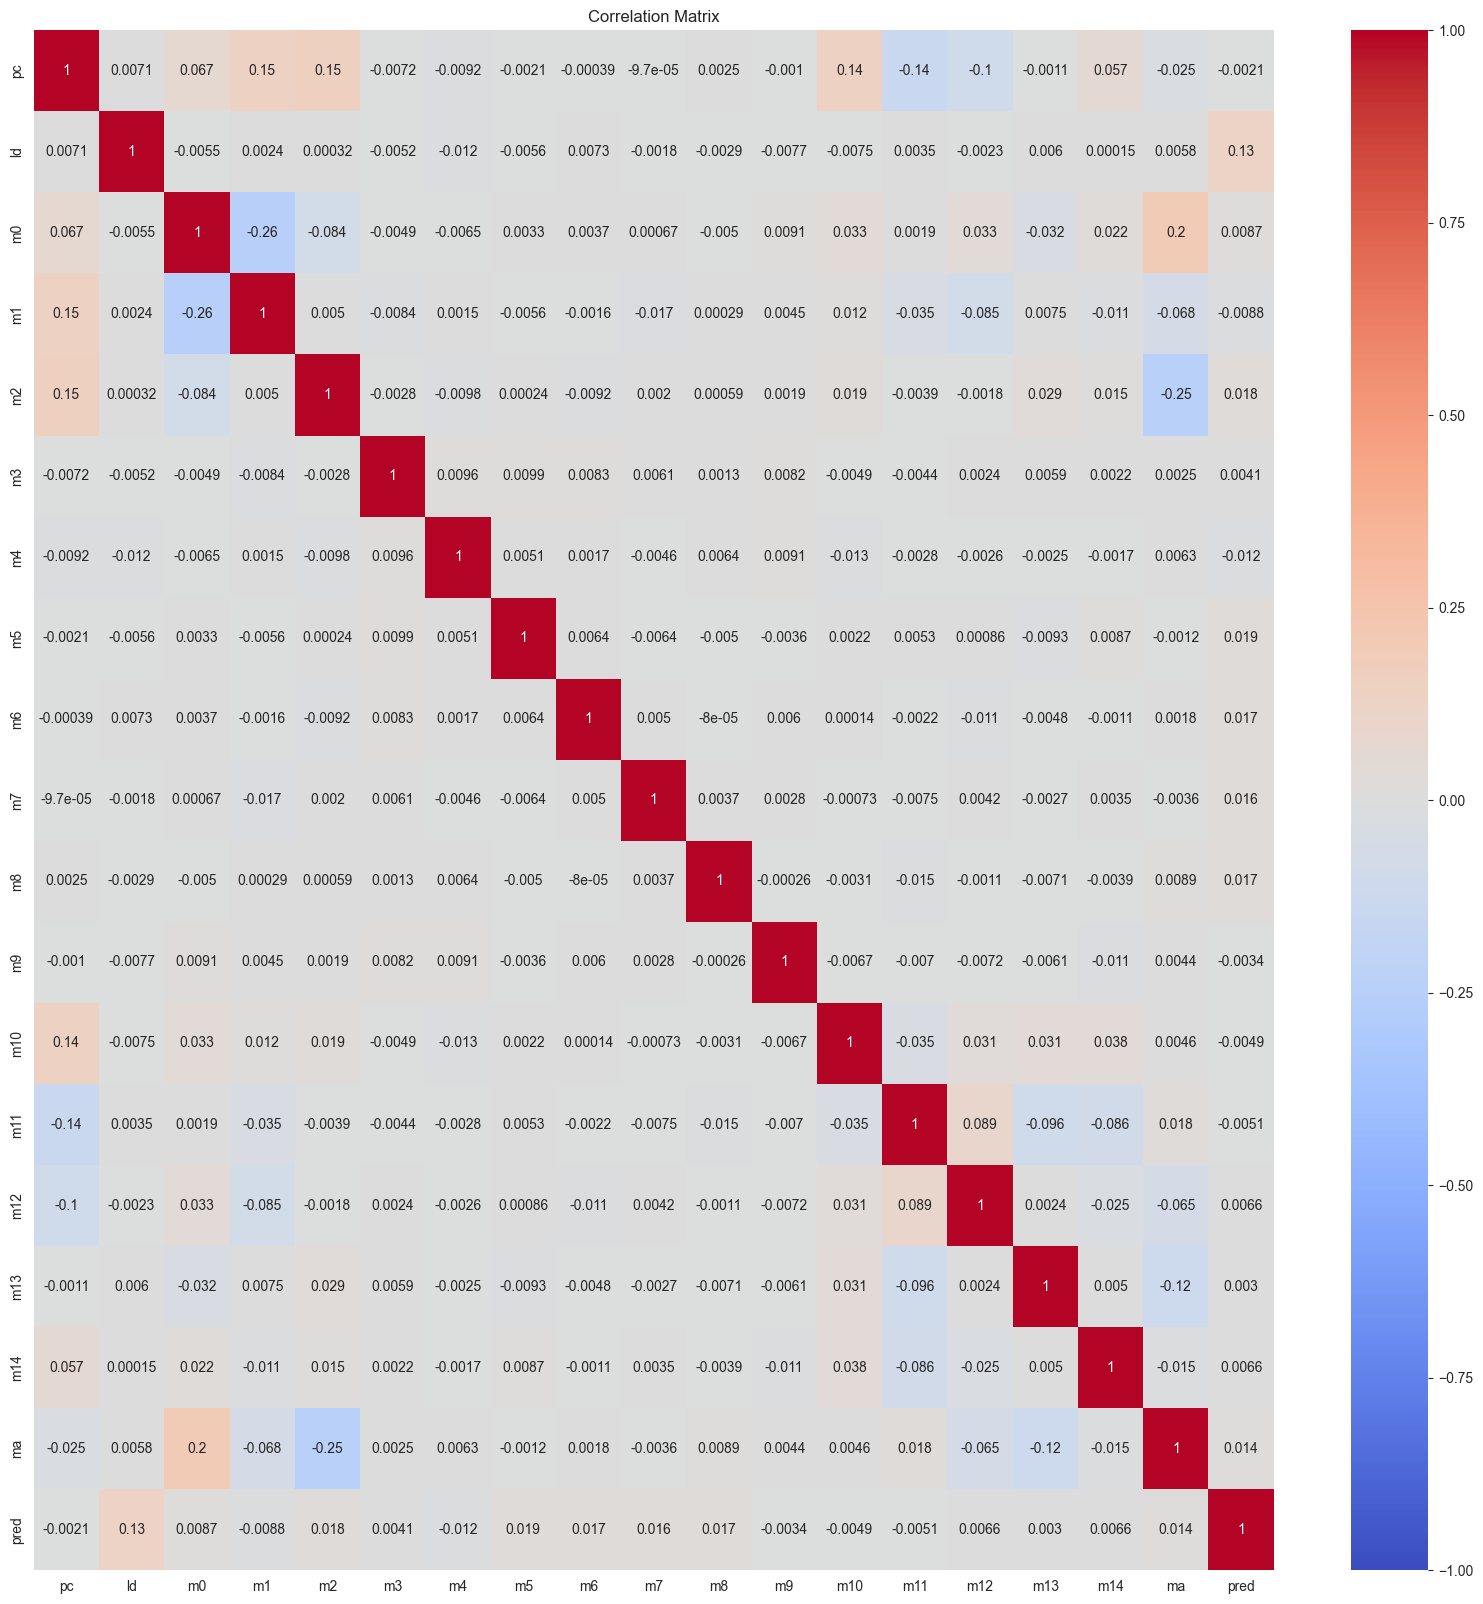

In [19]:
corr_matrix = all_df.drop(columns=["index"]).corr()

center = 0

# Define the colormap with emphasis on values away from zero
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Normalize the correlation matrix manually
max_abs = np.abs(corr_matrix.values).max()
norm_corr_matrix = corr_matrix / max_abs

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(norm_corr_matrix, annot=True, cmap=cmap, center=center, vmin=-1, vmax=1)

# Add a title to the plot
plt.title("Correlation Matrix")

# Display the plot
plt.show()

In [20]:
all_df.drop(columns=["m0","m1","m3","m9","m10","m11","m12","m13","m14","m4","m6","m7"],inplace=True)

In [381]:
# sns.kdeplot(data=train_df[train_df['pred']==0], x='m6', fill=True, label='Category 0')
# sns.kdeplot(data=train_df[train_df['pred']==1], x='m6', fill=True, label='Category 1')
# sns.kdeplot(test_df.m0,fill=True)
# plt.legend()
# plt.show()

In [21]:
all_df.m8.fillna(all_df.m8.mean(), inplace=True)
# all_df.m7.fillna(all_df.m7.mean(), inplace=True)
# all_df.m6.fillna(all_df.m6.mean(), inplace=True)
all_df.m5.fillna(all_df.m5.mean(), inplace=True)
# all_df.m4.fillna(all_df.m4.mean(), inplace=True)

In [22]:
all_df.isna().sum()

pc           0
ld           0
m2           0
m5           0
m8           0
ma           0
pred      3986
index    22584
dtype: int64

In [23]:
# all_df.loc[((all_df['pred'].isnull()) & (all_df["m8"].isnull())), 'm8'] = test_df.m8.mean()
# all_df.loc[((all_df['pred']==1)) & (all_df["m8"].isnull()), 'm8'] = train_df[train_df.pred==1]["m8"].mean()
# all_df.loc[((all_df['pred']==0)) & (all_df["m8"].isnull()), 'm8'] = train_df[train_df.pred==0]["m8"].mean()

# from sklearn.impute import KNNImputer
#
# imputer = KNNImputer(n_neighbors=5)
#
# all_df[["m8","m5"]] = imputer.fit_transform(all_df[["m8","m5"]])

In [24]:
# all_df.loc[((all_df['pred'].isnull()) & (all_df["m5"].isnull())), 'm5'] = test_df.m5.mean()
# all_df.loc[((all_df['pred']==1)) & (all_df["m5"].isnull()), 'm5'] = train_df[train_df.pred==1]["m5"].mean()
# all_df.loc[((all_df['pred']==0)) & (all_df["m5"].isnull()), 'm5'] = train_df[train_df.pred==0]["m5"].mean()

In [25]:
train_df = all_df[all_df['pred'].notnull()].copy()
test_df = all_df[all_df['pred'].isnull()].copy()

train_df.drop(columns=["index"],inplace=True)
train_df.pred =  train_df.pred.astype("int32")

In [26]:
train_df.head()

,pc,ld,m2,m5,m8,ma,pred
0,0.704738,-1.135539,-0.379737,-1.598567,0.135128,0.631373,0
1,0.704738,-0.486080,0.526868,-0.221603,0.706233,0.631373,0
2,-1.425754,1.076690,0.224667,-0.075074,-0.892067,0.402780,1
3,-0.005426,-0.139084,-0.077535,-1.715990,-0.560906,-1.997457,0
4,-1.425754,-0.061601,-0.681939,1.104177,0.320539,0.402780,0


In [27]:
X = train_df.drop(columns=["pred"])
y = train_df.pred

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

import xgboost as xgb
import lightgbm as lgb

In [29]:
def cross_val_f1_score(model, X, y):
    model_name = type(model).__name__
    scorer = make_scorer(f1_score)
    scores = cross_val_score(model, X, y, cv=5, scoring=scorer,n_jobs=-1)
    mean_score = scores.mean()
    print(f"F1 score for {model_name}: {mean_score:.4f}")

In [30]:
models = [
    LogisticRegression(max_iter=10000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    RidgeClassifier(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier(),
]




In [31]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# X = pca.fit_transform(X)
X_test = test_df.drop(columns=["index","pred"])

import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(X, y)
predictions = cls.predict(X_test)
# X_test = pca.fit_transform(X_test)

ModuleNotFoundError: No module named 'autosklearn'

In [393]:
# for model in models:
#     cross_val_f1_score(model,X,y)

In [394]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
#
# # Create the decision tree classifier
# dt_classifier = DecisionTreeClassifier()
#
# # Define the parameter grid for grid search
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 5, 10, 15, 20, 25],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 6],
#     'max_features': [None, 'sqrt', 'log2'],
#     'class_weight': [None, 'balanced', {0: 1, 1: 2}]
# }
#
# scorer = make_scorer(f1_score)
# # Create the GridSearchCV object
# grid_search = GridSearchCV(dt_classifier, param_grid, cv=5,scoring=scorer,n_jobs=-1)
#
# # Fit the GridSearchCV object to the data
# grid_search.fit(X, y)
#
# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
#
# # Print the best parameters and best score
# print("Best Parameters: ", best_params)
# print("Best Score: ", best_score)
#
# # Get the best model
# best_model = grid_search.best_estimator_


In [395]:
best_model = DecisionTreeClassifier(class_weight="balanced",criterion="entropy",max_depth=5,max_features=None,min_samples_leaf=1,min_samples_split=10,splitter="random")
cross_val_f1_score(best_model,X,y)

F1 score for DecisionTreeClassifier: 0.3325


In [396]:
best_model.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=10, splitter='random')

In [397]:


y_pred = best_model.predict(X_test)

In [398]:
df = pd.DataFrame(data = {"pred":y_pred})

In [399]:
df.index+=1

In [400]:
df.head()

,pred
1,1
2,0
3,0
4,1
5,1


In [401]:
df.to_csv("sub.csv",index=False)